## Money Flow Index (MFI)

Again, we are starting to see a trend in technical indicators, the MFI is also a measure of overbought and oversold.
<br>
Once a ceiling is hit, the MFI tells us we should sell, and vice versa for a floor, of 80-20 or 90-10.

_**Formula:**_

$\bullet$ **Money Flow Index:** $ 100 - \frac {100}{1 + Money Flow Ratio}$

where:

$\bullet$ **Money Flow Ratio:** $ \frac {14 Period Positive Money Flow}{14 Period Negative Money Flow}$

$\bullet$ **Raw Money Flow:** $ Typical Price * Volume $ 

$\bullet$ **Typical Price:** $ \frac {High+Low+Close}{3} $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set_style('darkgrid')

import pandas_datareader as pdr

In [5]:
ticker = input('Please input the ticker you want to look at: ').upper()
# upper() function to capitalise

start = '2017-01-01'
end = '2021-01-01'

stock = pdr.DataReader(ticker, 'yahoo', start, end)
highs = stock['High']
lows = stock['Low']
data = stock['Adj Close']
volume = stock['Volume']

Please input the ticker you want to look at:  jpm


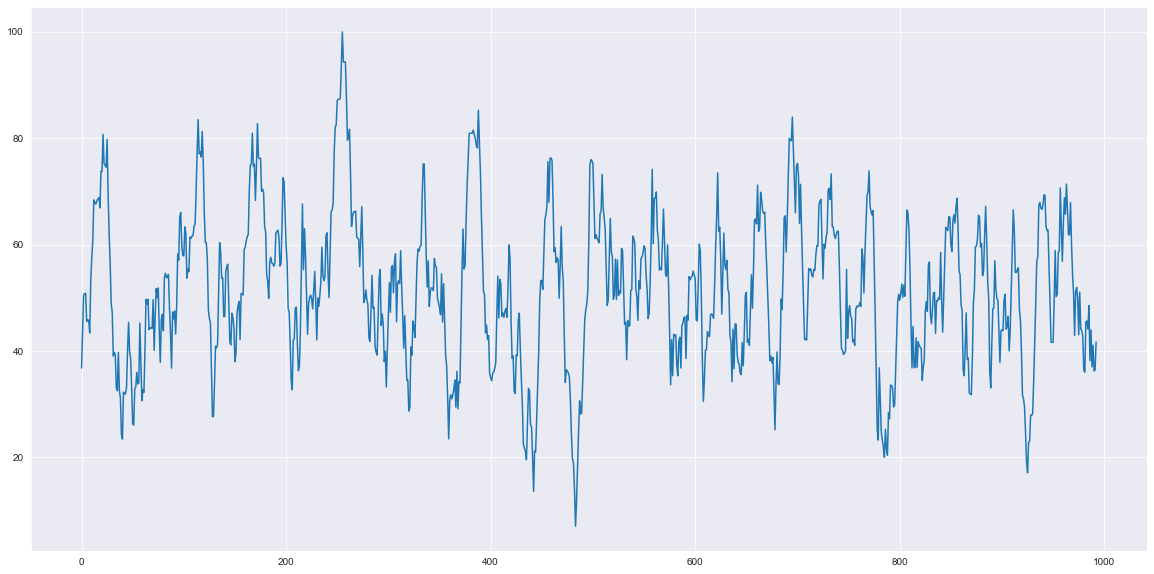

In [6]:
typical_price = (highs + lows + data) / 3
# Typical Price calculation

raw_money_flow = typical_price * volume
# Raw Money Flow calculation

positive_flow = []
negative_flow = []
# Positive/negative flows empty lists

period = 14

# The foor loop below gives us the positive and negative flows
for i in range(1, len(typical_price)):
    if typical_price[i] > typical_price[i - 1]:
        # Current price greater than previous price
        
        positive_flow.append(raw_money_flow[i - 1])
        negative_flow.append(0)
        
    elif typical_price[i] < typical_price[i - 1]:
        # Current price less than previous price
        
        positive_flow.append(0)
        negative_flow.append(raw_money_flow[i - 1])
        
    else:
        positive_flow.append(0)
        negative_flow.append(0)
        
positive_money_flow = []
negative_money_flow = []

[positive_money_flow.append(sum(positive_flow[i + 1 - period: i + 1])) for i in range(period - 1, len(positive_flow))]   
[negative_money_flow.append(sum(negative_flow[i + 1 - period: i + 1])) for i in range(period - 1, len(negative_flow))]
# 1 line for loops must be inside square brackets and the thing we want returned must be at the front of the first loop
# For example:
    # for i in range(0, 10):
        # print(i)
    # This would turn into:
    # [print(i) for i in range(0, 10)]
    
        # Just makes things look prettier.
    
    
mfi = 100 * np.array(positive_money_flow) / (np.array(positive_money_flow) + np.array(negative_money_flow))
# We have to convert the data into arrays because otherwise we cannot perform
# these operations on a list

ceiling = 80
floor = 20

plt.figure(figsize=(20,10))
plt.plot(mfi)
plt.show();
# Let's see the mfi

In [7]:
# Generating Buy/Sell signals

def mfi_buysell(data, highs, lows, mfi):
    data = data[period:]
    signal_buy_price = []
    signal_sell_price = []
    mfi_signal_buy_price = []
    mfi_signal_sell_price = []
    
    flag = -1
    
    for i in range(0, len(mfi)):
        if mfi[i] >= highs and flag != 1:
            signal_buy_price.append(np.nan)
            mfi_signal_buy_price.append(np.nan)
            
            signal_sell_price.append(data[i])
            mfi_signal_sell_price.append(mfi[i])
            flag = 1
            
        elif mfi[i] <= lows and flag != 0:
            signal_buy_price.append(data[i])
            mfi_signal_buy_price.append(mfi[i])
            
            signal_sell_price.append(np.nan)
            mfi_signal_sell_price.append(np.nan)
            flag = 0
            
        else:
            signal_buy_price.append(np.nan)
            mfi_signal_buy_price.append(np.nan)
            
            signal_sell_price.append(np.nan)
            mfi_signal_sell_price.append(np.nan)
            
    return signal_buy_price, signal_sell_price, mfi_signal_buy_price, mfi_signal_sell_price

In [8]:
buy, sell, mfi_buy, mfi_sell = mfi_buysell(data, ceiling, floor, mfi)

mfi_dataframe = pd.DataFrame({'MFI': mfi})

mfi_dataframe[f'{ticker} Buy Price'] = buy
mfi_dataframe[f'{ticker} Sell Price'] = sell
mfi_dataframe[f'{ticker} MFI Buy Price'] = mfi_buy
mfi_dataframe[f'{ticker} MFI Sell Price'] = mfi_sell
mfi_dataframe[f'{ticker} Index'] = data.index[period:]
mfi_dataframe = mfi_dataframe.set_index(mfi_dataframe[f'{ticker} Index'])
mfi_dataframe = mfi_dataframe.drop(columns = [f'{ticker} Index'])
mfi_dataframe[f'{ticker} Share Price'] = data
mfi_dataframe

,MFI,JPM Buy Price,JPM Sell Price,JPM MFI Buy Price,JPM MFI Sell Price,JPM Share Price
JPM Index,,,,,,
2017-01-24,36.805893,NaN,NaN,NaN,NaN,74.324356
2017-01-25,43.757000,NaN,NaN,NaN,NaN,75.473625
2017-01-26,50.463403,NaN,NaN,NaN,NaN,76.105278
2017-01-27,50.808515,NaN,NaN,NaN,NaN,76.263184
2017-01-30,50.867303,NaN,NaN,NaN,NaN,75.473625
...,...,...,...,...,...,...
2020-12-24,37.019814,NaN,NaN,NaN,NaN,121.469612
2020-12-28,41.075989,NaN,NaN,NaN,NaN,122.269531
2020-12-29,36.254530,NaN,NaN,NaN,NaN,121.947624


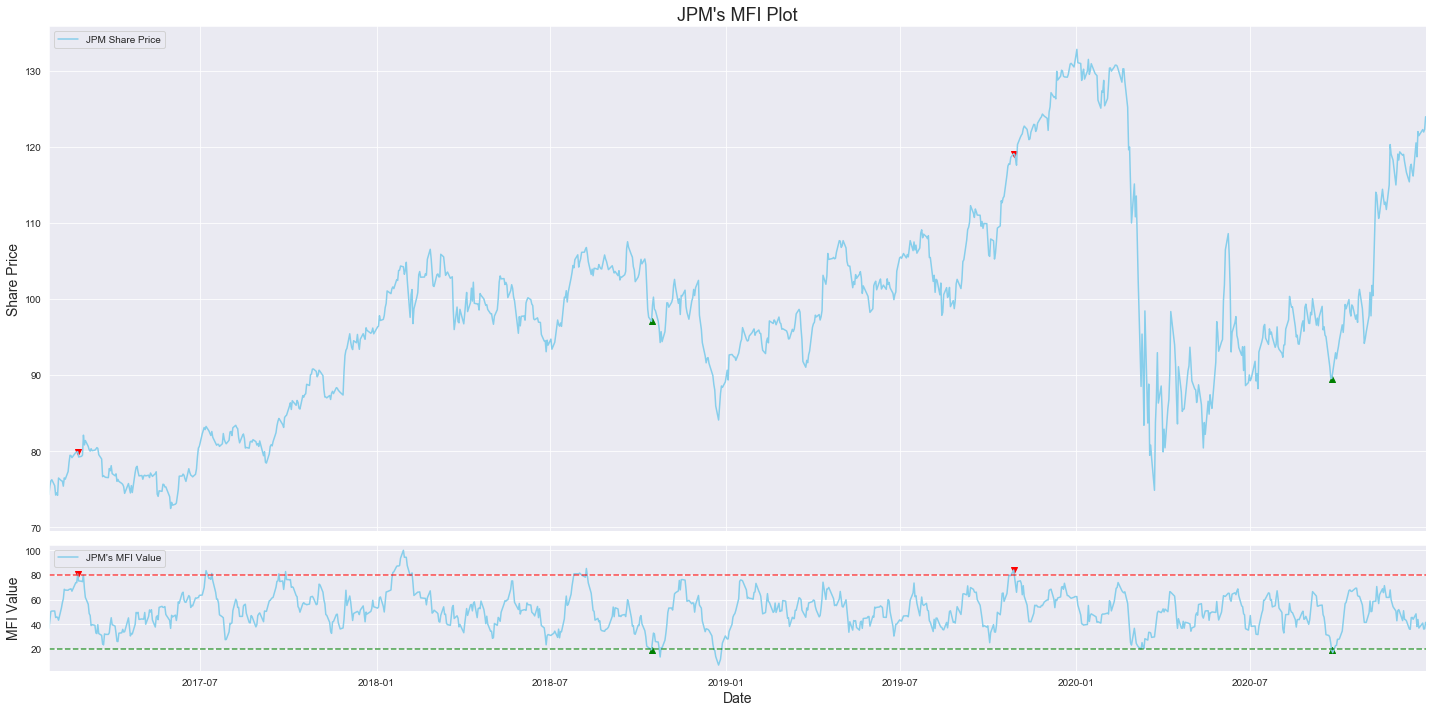

In [9]:
fig, ax = plt.subplots(2, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios':[2, 0.5]})

ax[0].plot(mfi_dataframe[f'{ticker} Share Price'], label=f'{ticker} Share Price', c='skyblue')
ax[0].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} Buy Price'], marker='^', c='g')
ax[0].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} Sell Price'], marker='v', c='r')
ax[0].set_title(f'{ticker}\'s MFI Plot', fontsize=18)
ax[0].set_ylabel('Share Price', fontsize=14)
ax[0].legend(loc='upper left')

ax[1].plot(mfi_dataframe['MFI'], c='skyblue', label=f'{ticker}\'s MFI Value')
ax[1].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} MFI Buy Price'], marker='^', c='g')
ax[1].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} MFI Sell Price'], marker='v', c='r')
ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylabel('MFI Value', fontsize=14)
ax[1].axhline(y=ceiling, ls='--', c='r', alpha=0.7)
ax[1].axhline(y=floor, ls='--', c='g', alpha=0.7)
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.margins(x=0)
plt.show()

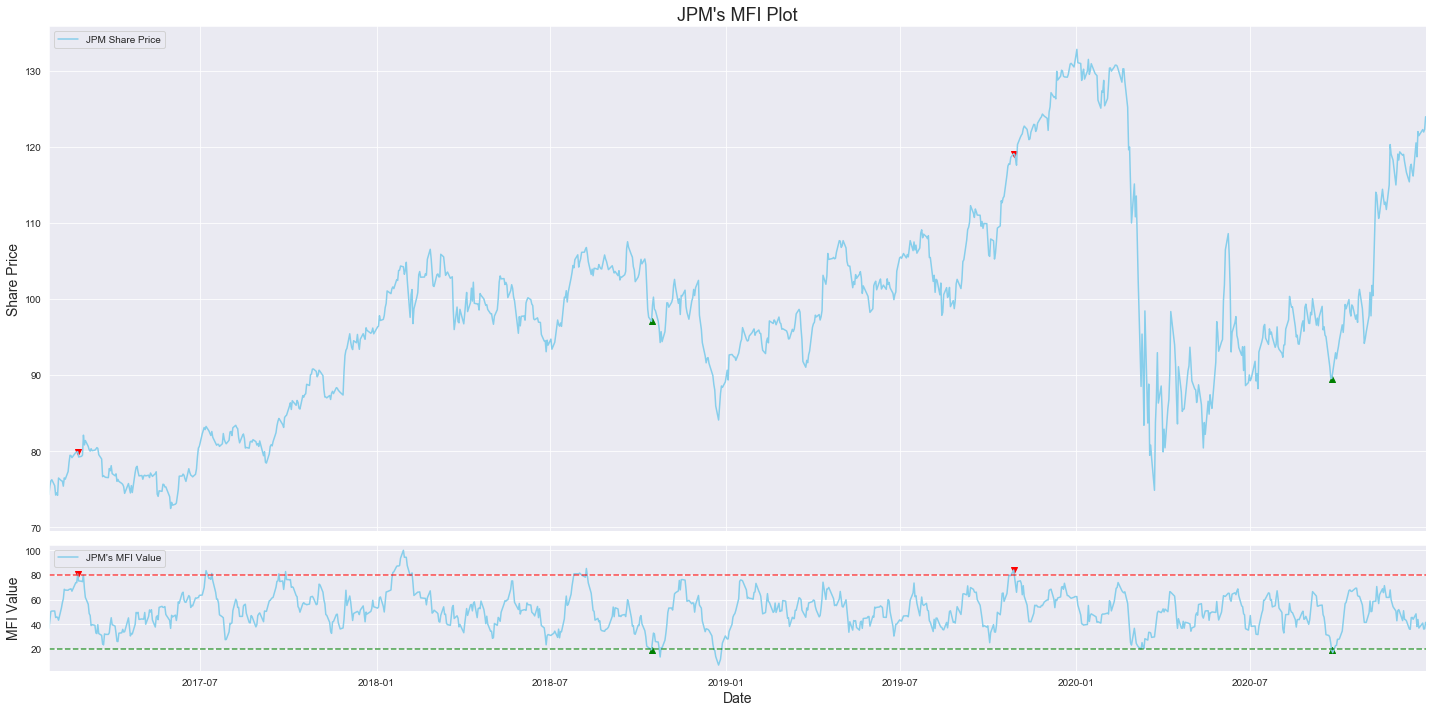

In [10]:
# In summary:

typical_price = (highs + lows + data) / 3
raw_money_flow = typical_price * volume
positive_flow = []
negative_flow = []
period = 14
for i in range(1, len(typical_price)):
    if typical_price[i] > typical_price[i - 1]:
        positive_flow.append(raw_money_flow[i - 1])
        negative_flow.append(0)
    elif typical_price[i] < typical_price[i - 1]:
        positive_flow.append(0)
        negative_flow.append(raw_money_flow[i - 1])
    else:
        positive_flow.append(0)
        negative_flow.append(0)
positive_money_flow = []
negative_money_flow = []
for i in range(period - 1, len(positive_flow)):
    positive_money_flow.append(sum(positive_flow[i + 1 - period: i + 1]))
for i in range(period - 1, len(negative_flow)):
    negative_money_flow.append(sum(negative_flow[i + 1 - period: i + 1]))
mfi = 100 * np.array(positive_money_flow) / (np.array(positive_money_flow) + np.array(negative_money_flow))
ceiling = 80
floor = 20

# Buy/Sell Function
def mfi_buysell(data, highs, lows, mfi):
    data = data[period:]
    signal_buy_price = []
    signal_sell_price = []
    mfi_signal_buy_price = []
    mfi_signal_sell_price = []
    
    flag = -1
    
    for i in range(0, len(mfi)):
        if mfi[i] >= highs and flag != 1:
            signal_buy_price.append(np.nan)
            mfi_signal_buy_price.append(np.nan)
            
            signal_sell_price.append(data[i])
            mfi_signal_sell_price.append(mfi[i])
            flag = 1
            
        elif mfi[i] <= lows and flag != 0:
            signal_buy_price.append(data[i])
            mfi_signal_buy_price.append(mfi[i])
            
            signal_sell_price.append(np.nan)
            mfi_signal_sell_price.append(np.nan)
            flag = 0
            
        else:
            signal_buy_price.append(np.nan)
            mfi_signal_buy_price.append(np.nan)
            
            signal_sell_price.append(np.nan)
            mfi_signal_sell_price.append(np.nan)
            
    return signal_buy_price, signal_sell_price, mfi_signal_buy_price, mfi_signal_sell_price

# The DataFrame
buy, sell, mfi_buy, mfi_sell = mfi_buysell(data, ceiling, floor, mfi)

mfi_dataframe = pd.DataFrame({
    'MFI': mfi,
    f'{ticker} Buy Price': buy,
    f'{ticker} Sell Price': sell,
    f'{ticker} MFI Buy Price': mfi_buy,
    f'{ticker} MFI Sell Price': mfi_sell
})

mfi_dataframe[f'{ticker} Index'] = data.index[period:]
mfi_dataframe = mfi_dataframe.set_index(mfi_dataframe[f'{ticker} Index'])
mfi_dataframe = mfi_dataframe.drop(columns = [f'{ticker} Index'])
mfi_dataframe[f'{ticker} Share Price'] = data

# Plot
fig, ax = plt.subplots(2, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios':[2, 0.5]})

ax[0].plot(mfi_dataframe[f'{ticker} Share Price'], label=f'{ticker} Share Price', c='skyblue')
ax[0].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} Buy Price'], marker='^', c='g')
ax[0].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} Sell Price'], marker='v', c='r')
ax[0].set_title(f'{ticker}\'s MFI Plot', fontsize=18)
ax[0].set_ylabel('Share Price', fontsize=14)
ax[0].legend(loc='upper left')

ax[1].plot(mfi_dataframe['MFI'], c='skyblue', label=f'{ticker}\'s MFI Value')
ax[1].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} MFI Buy Price'], marker='^', c='g')
ax[1].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} MFI Sell Price'], marker='v', c='r')
ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylabel('MFI Value', fontsize=14)
ax[1].axhline(y=ceiling, ls='--', c='r', alpha=0.7)
ax[1].axhline(y=floor, ls='--', c='g', alpha=0.7)
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.margins(x=0)
plt.show();